# **Time Series of 2023 Heat Index in Munoz, Nueva Ecjia**

**Prepared By:** Jann Rovic Cueto

**University:** Rizal Technological University

**References:**
- ACF/PACF - https://towardsdatascience.com/significance-of-acf-and-pacf-plots-in-time-series-analysis-2fa11a5d10a8

- ADF - https://medium.com/@cmukesh8688/why-is-augmented-dickey-fuller-test-adf-test-so-important-in-time-series-analysis-6fc97c6be2f0

**Change this with your actual group information download the notebook tpos lagay nyo sa drive nyo para maload nyo sya true google colab.**

In [ ]:
# Magic function that will make your plot outputs appear and be stored within the notebook
%matplotlib inline

# Function used to to render higher resolution images
%config InlineBackend.figure_format = 'retina'

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")


# Data manipulation
import os
import pandas as pd
import numpy as np
from datetime import datetime, date

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Standardizing the style for the visualizations
sns.set_theme()
sns.set_palette("pastel")
plt.style.use('seaborn-whitegrid')

#Uploading from the device
#Uploading from the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **The Heat Index Equation**

- The computation of the heat index is a refinement of a result obtained by multiple regression analysis carried out by Lans P. Rothfusz and described in a 1990 National Weather Service (NWS) Technical Attachment (SR 90-23).  The regression equation of Rothfusz is

$HI = (-42.379 + 2.04901523*T) + (10.14333127*RH) - (.22475541*T*RH) - (.00683783*T*T) - (.05481717*RH*RH) + (.00122874*T*T*RH) + (.00085282*T*RH*RH) - (.00000199*T*T*RH*RH)$

> where T is temperature in degrees F and RH is relative humidity in percent.  HI is the heat index expressed as an apparent temperature in degrees F.  If the RH is less than 13% and the temperature is between 80 and 112 degrees F, then the following adjustment is subtracted from HI:


$ ADJUSTMENT =[\frac{13-RH}{4}]^2 [\frac{(17-ABS*(T-95.))}{17}]$

> where ABS and SQRT are the absolute value and square root functions, respectively.  On the other hand, if the RH is greater than 85% and the temperature is between 80 and 87 degrees F, then the following adjustment is added to HI:

$ADJUSTMENT = [(RH-85)/10] * [(87-T)/5]$

- The Rothfusz regression is not appropriate when conditions of temperature and humidity warrant a heat index value below about 80 degrees F. In those cases, a simpler formula is applied to calculate values consistent with Steadman's results:

$ HI = 0.5 * {T + 61.0 + [(T-68.0)*1.2] + (RH*0.094)}$

- In practice, the simple formula is computed first and the result averaged with the temperature. If this heat index value is 80 degrees F or higher, the full regression equation along with any adjustment as described above is applied.

- The Rothfusz regression is not valid for extreme temperature and relative humidity conditions beyond the range of data considered by Steadman.

Click Here: [Heat Index Formula](https://www.wpc.ncep.noaa.gov/html/heatindex_equation.shtml)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Hortaleza/METEO/Munoz_2023.csv')
df.head()

,date,rh,avetemp
0,01/01/2023,71,28.05
1,02/01/2023,71,28.00
2,03/01/2023,75,27.50
3,04/01/2023,72,27.05
4,05/01/2023,83,25.20


**I. Data Engineering**

In [ ]:
# We use the simple formula made by Rothfusz regression.
# The other formula are only use depends on the data its just for adjustment.

df['avetemp'] = pd.to_numeric(df['avetemp'], errors='coerce')  # Convert 'AVETEMP' to numeric
df['rh'] = pd.to_numeric(df['rh'], errors='coerce')  # Convert 'RH' to numeric

# Apply the formula for Heat index
df['hi'] = 0.5 * df['avetemp'] + 61.0 + ((df['avetemp'] - 68.0) * 1.2) + (df['rh'] * 0.094)
print(df)

           date  rh  avetemp      hi
0    01/01/2023  71    28.05  33.759
1    02/01/2023  71    28.00  33.674
2    03/01/2023  75    27.50  33.200
3    04/01/2023  72    27.05  32.153
4    05/01/2023  83    25.20  30.042
..          ...  ..      ...     ...
268  26/09/2023  64    26.95  31.231
269  27/09/2023  81    27.05  32.999
270  28/09/2023  68    27.85  33.137
271  29/09/2023  70    26.40  30.860
272  30/09/2023  74    25.60  29.876

[273 rows x 4 columns]


In [ ]:
df

,date,rh,avetemp,hi
0,01/01/2023,71,28.05,33.759
1,02/01/2023,71,28.00,33.674
2,03/01/2023,75,27.50,33.200
3,04/01/2023,72,27.05,32.153
4,05/01/2023,83,25.20,30.042
...,...,...,...,...
268,26/09/2023,64,26.95,31.231
269,27/09/2023,81,27.05,32.999
270,28/09/2023,68,27.85,33.137
271,29/09/2023,70,26.40,30.860


In [ ]:
df.describe()

,rh,avetemp,hi
count,273.000000,273.000000,273.000000
mean,72.677656,27.653297,33.242304
std,5.960542,1.633701,2.844583
min,62.000000,23.500000,26.167000
25%,68.000000,26.550000,31.267000
50%,71.000000,27.400000,32.815000
75%,78.000000,28.700000,35.124000
max,87.000000,32.100000,41.584000


In [ ]:
print(df.columns)

Index(['date', 'rh', 'avetemp', 'hi'], dtype='object')


In [ ]:
# Dataset length
print('The total number of rows in the dataset is: ',len(df))

The total number of rows in the dataset is:  273


In [ ]:
# Date original data type
type(df['date'][0])

str

In [ ]:
# Transforming date(str) to Timestamp format
df['date'] =pd.to_datetime(df['date'], format = '%d/%m/%Y')

In [ ]:
# Table showing the number of missing values and percentage
# of missing values in the current dataset
dict = {}
for i in list(df.columns):
    dict[i] = (df[i].isnull().sum(),round(df[i].isnull().sum()/len(df)*100,2))

pd.DataFrame(dict,index=["# of missing values","% of missing values"]).transpose().sort_values(by=["# of missing values"], ascending=False)

,# of missing values,% of missing values
date,0.0,0.0
rh,0.0,0.0
avetemp,0.0,0.0
hi,0.0,0.0


**II.Data Visualization**

Plotting Timeseries of Multiple Parameters

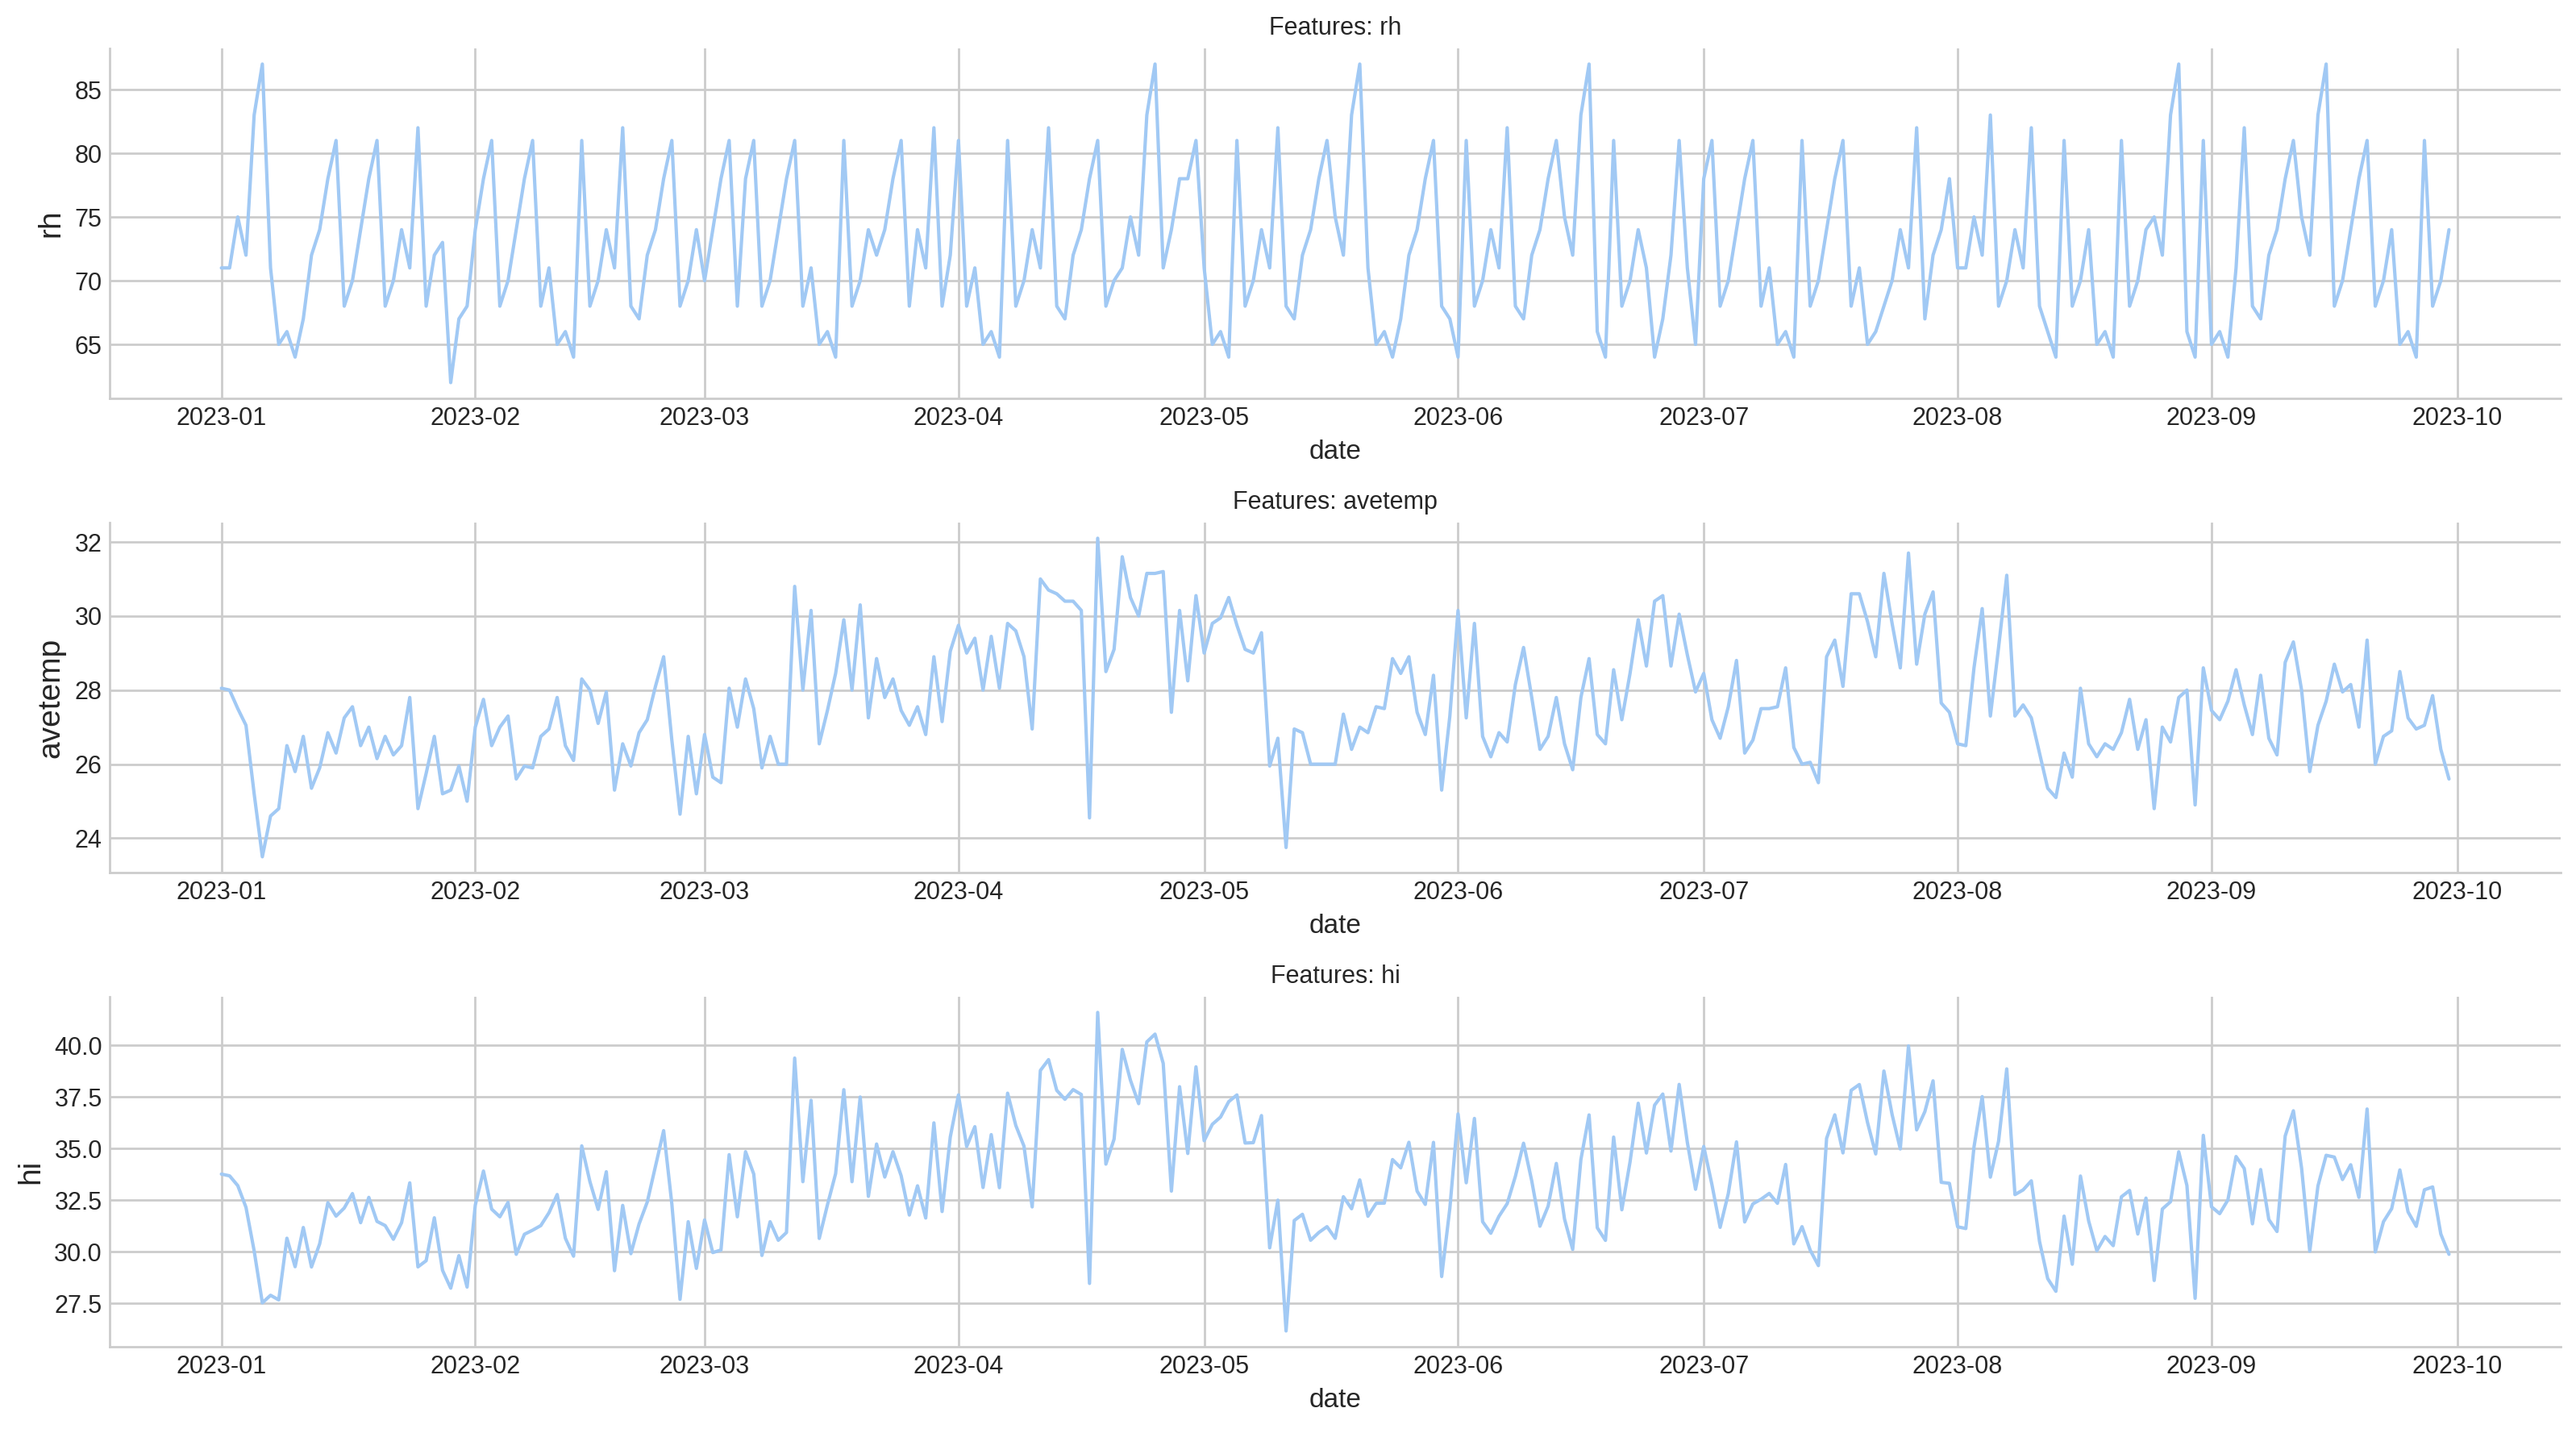

In [ ]:
# Plotting each of the time series
fig, ax =plt.subplots(nrows=3,ncols=1,figsize=(16,9)) # lagi gamitin ito para macontrol and plot size figures
sns.despine()

for i, column in enumerate(df.drop('date', axis=1).columns):
    sns.lineplot(x=df['date'], y=df[column], ax=ax[i])
    ax[i].set_title('Features: {}'.format(column), fontsize=11)
    ax[i].set_ylabel(ylabel=column, fontsize=14)


plt.tight_layout()

**III. Data Visualization**

**Augmented Dickey-Fuller Test Statistics**

To perform the ADF test, we define a function that allows us to visualize the results:

- A green curve indicates that our ADF statistic is below 1% of the critical value (time series is stationary).

- A orange curve indicates that our ADF statistic is above 1% of the critical value but below 5% of the critical value (time series is stationary).

- A red curve indicates that our ADF statistic is above 5% of the critical value (time series is not stationary), and we need to apply transformations to make it stationary.

We perform this test to ensure that our time series is stationary and can be fed successfully into the ARIMA model.But we will not go further on that since the goal of the study is to identify  the changes from pre and post.

**Other Explanation**

- Augmented Dickey-Fuller (ADF) test is a type of statistical test called a unit root test. Unit roots are a cause for non-stationarity.

> Null Hypothesis (H0): Time series has a unit root. (Time series is not stationary).

> Alternate Hypothesis (H1): Time series has no unit root (Time series is stationary).

- If the null hypothesis can be rejected, we can conclude that the time series is stationary.

There are two ways to rejects the null hypothesis:

- On the one hand, the null hypothesis can be rejected if the p-value is below a set significance level. The defaults significance level is 5%

- p-value > significance level (default: 0.05): Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.

- p-value <= significance level (default: 0.05): Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

On the other hand, the null hypothesis can be rejects if the test statistic is less than the critical value.

- ADF statistic > critical value: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.

- ADF statistic < critical value: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [ ]:
import math
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

In [ ]:
# Function to visualize Augmented Dickey–Fuller test
def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen'
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'orange'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'red'
    else:
        linecolor = 'purple'
    sns.lineplot(x=df['date'], y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

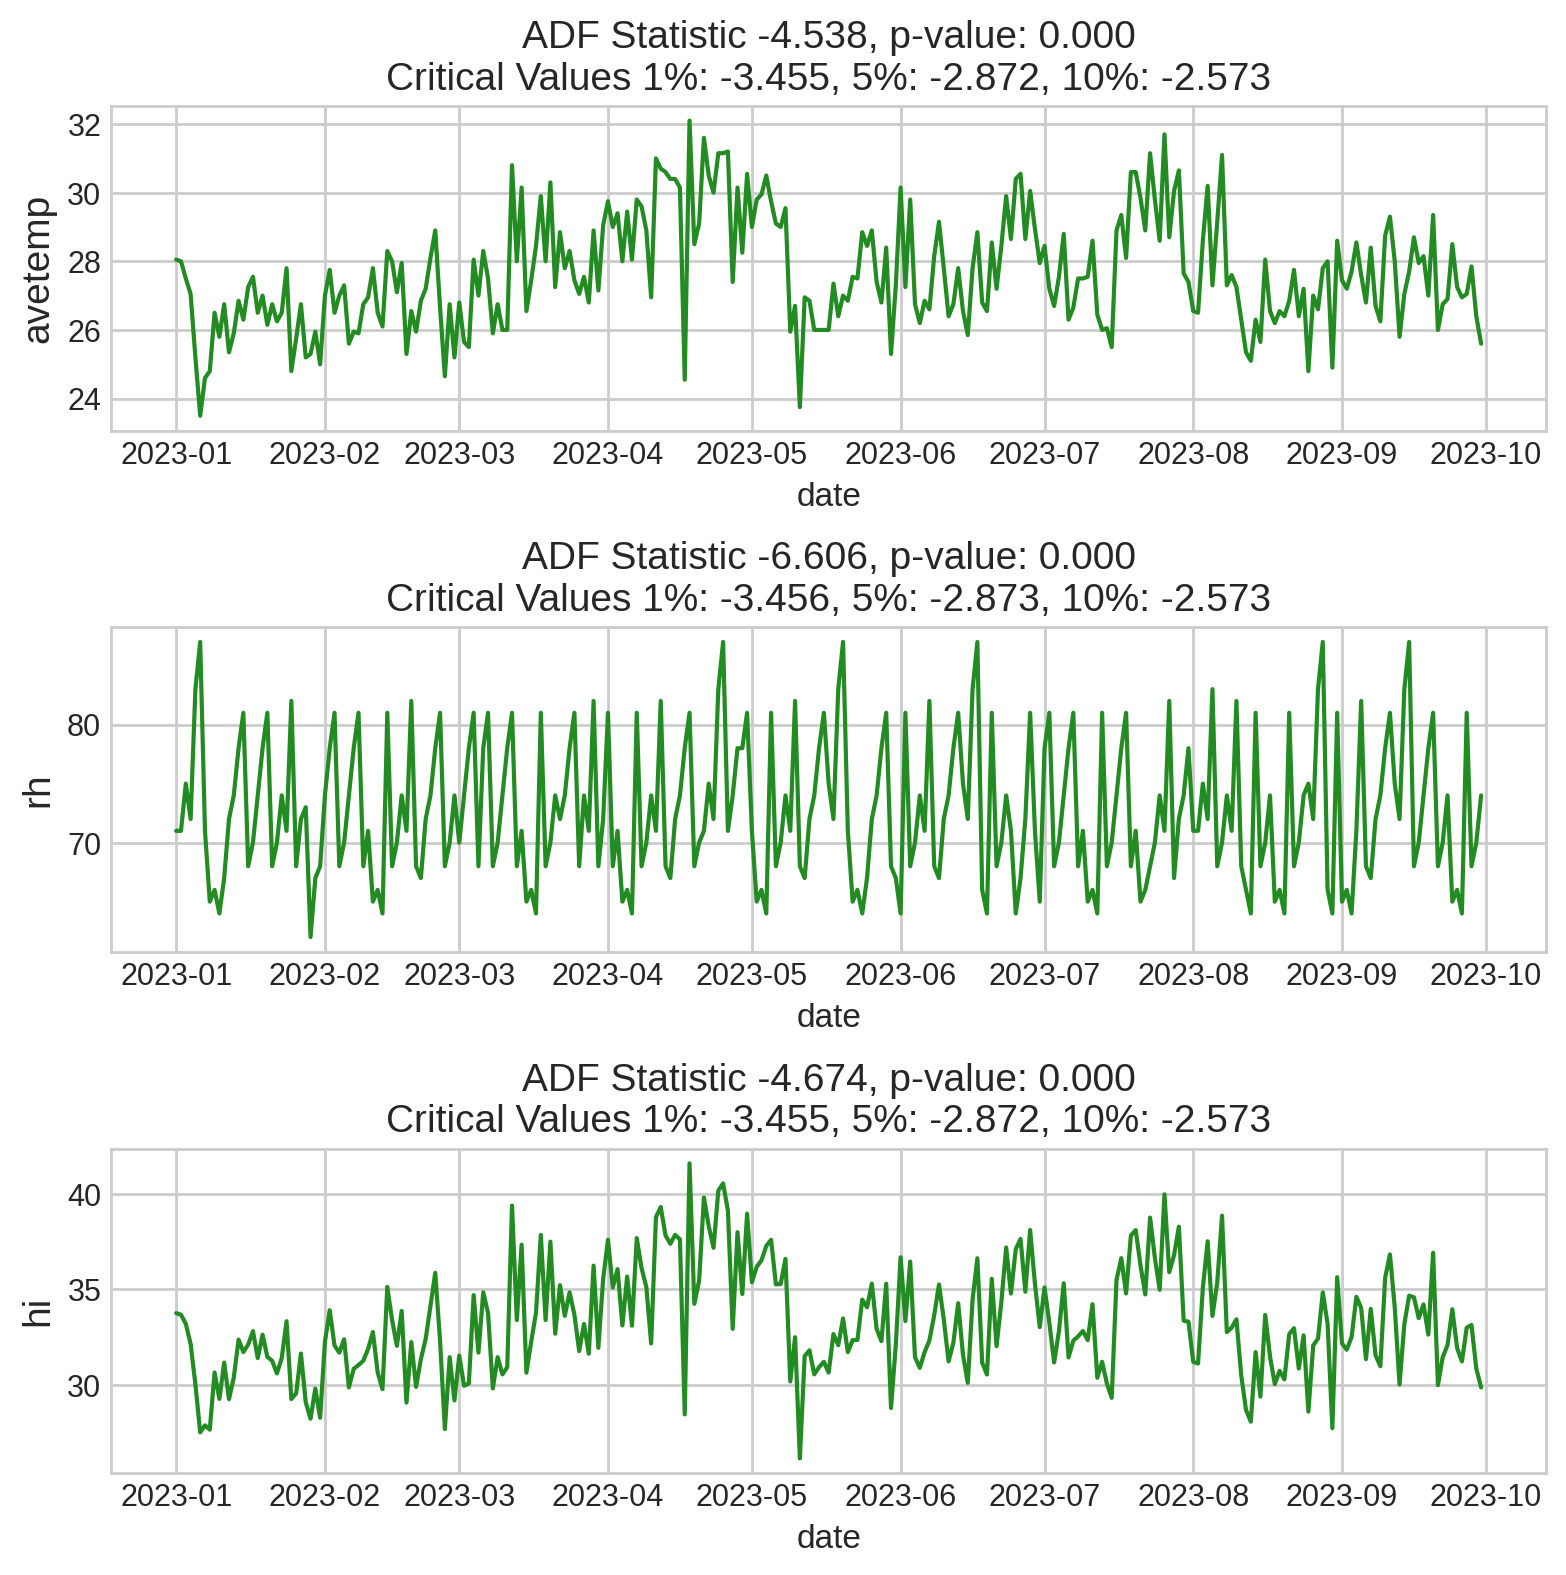

In [ ]:
# Plotting Augmented Dickey–Fuller test results for each column
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8, 8))

visualize_adfuller_results(df['avetemp'].values, 'avetemp', ax[0])
visualize_adfuller_results(df['rh'].values, 'rh', ax[1])
visualize_adfuller_results(df['hi'].values, 'hi', ax[2])

plt.tight_layout()

**IV. Transforming and Differencing**

we are not going to transform and difference data the since its all stationary. Please do refer to the hyphotesis for the use of ADF Statistics. We apply statistics to support our agument. This is importaant to make sure that the decomposing if the data is important to be stationary so that the trend that will see give a good results.

**V. Decomposing of Timeseries**

In [ ]:
# Use date time index to use the actual date but this is not always applicable if the data is to long.
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

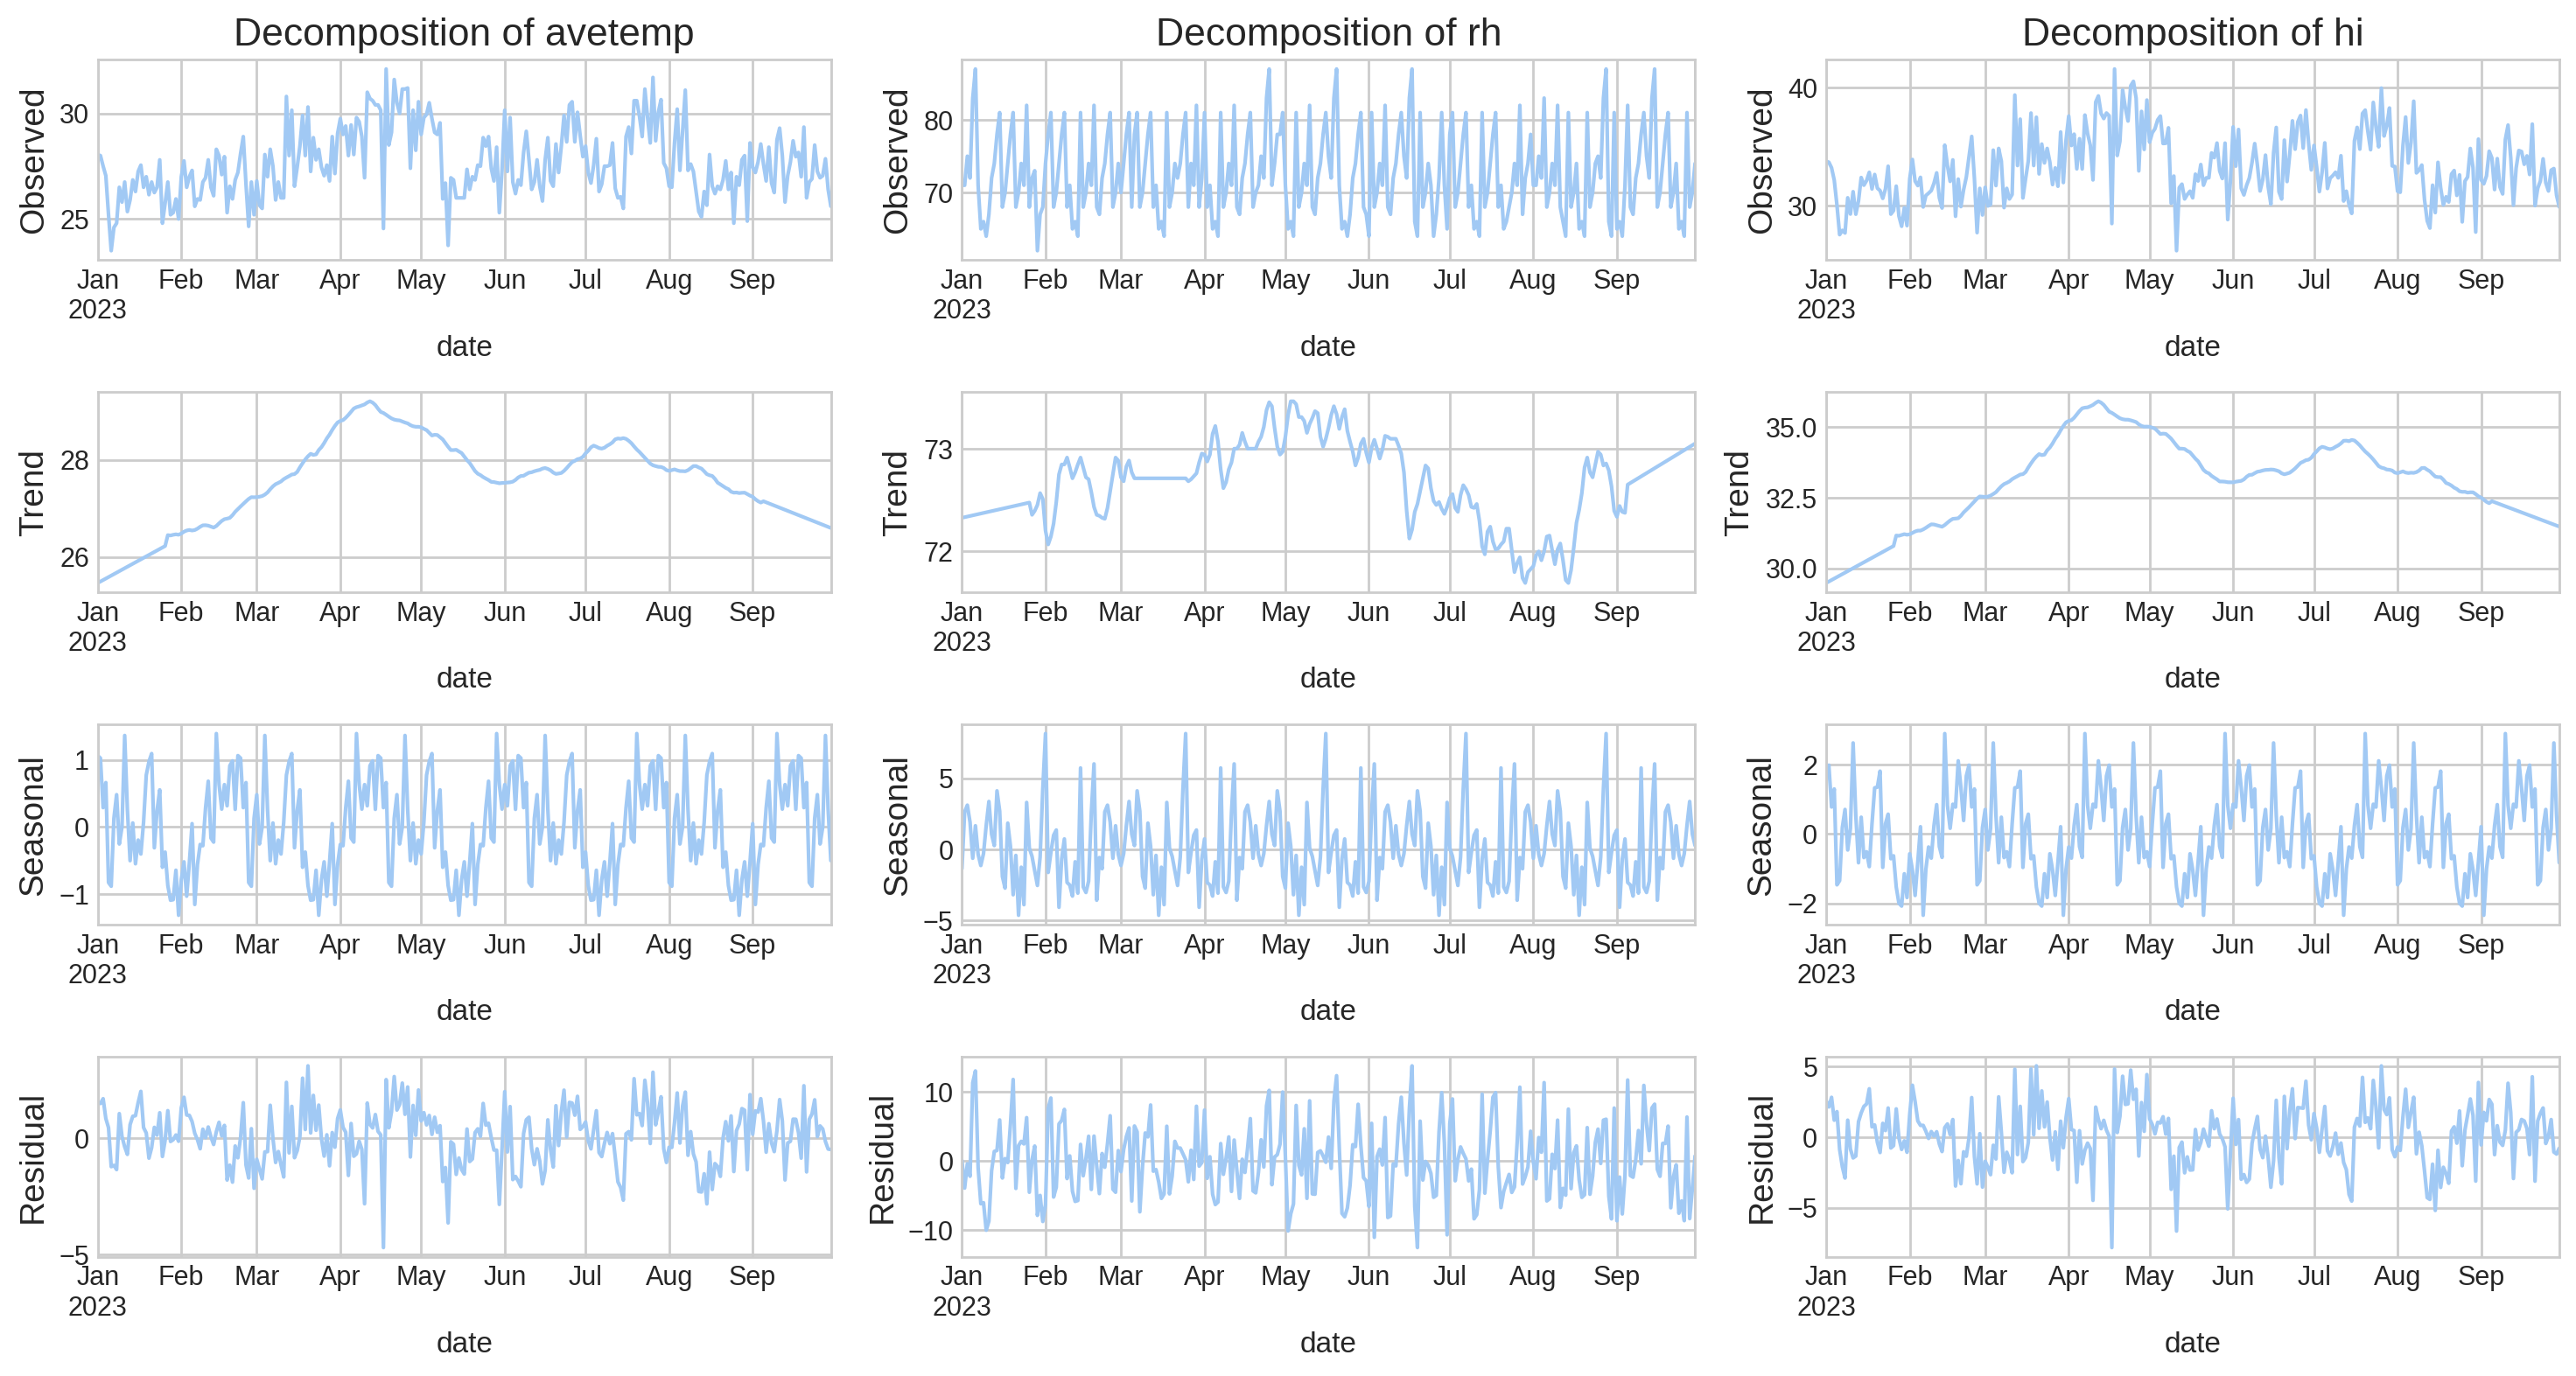

In [ ]:
#Decomposing TimeSeries
columns = ['avetemp', 'rh', 'hi']

fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(15, 8))

for i, column in enumerate(columns):
    res = seasonal_decompose(df[column], period=52, model='additive', extrapolate_trend='freq')

    ax[0, i].set_title('Decomposition of {}'.format(column), fontsize=16)
    res.observed.plot(ax=ax[0, i], legend=False)
    ax[0, i].set_ylabel('Observed', fontsize=14)

    res.trend.plot(ax=ax[1, i], legend=False)
    ax[1, i].set_ylabel('Trend', fontsize=14)

    res.seasonal.plot(ax=ax[2, i], legend=False)
    ax[2, i].set_ylabel('Seasonal', fontsize=14)

    res.resid.plot(ax=ax[3, i], legend=False)
    ax[3, i].set_ylabel('Residual', fontsize=14)

plt.tight_layout()
plt.show()


**VI. Correlation**

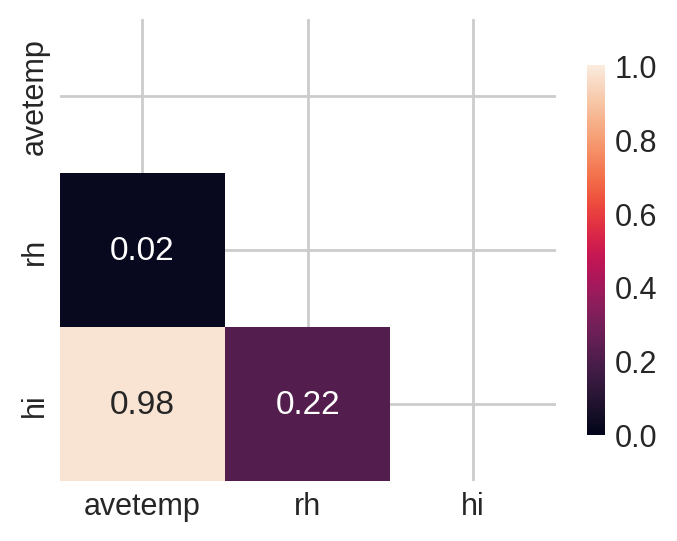

In [ ]:
# Plotting correlation heatmap of the dataset
corr=df[columns].corr()
mask= np.triu(np.ones_like(corr,dtype=np.bool))
fig,ax= plt.subplots(figsize=(4,3))
sns.heatmap(corr,mask=mask, annot=True, fmt=".2f",cbar_kws={"shrink": .8}, vmin=0, vmax=1)
None

We can no analyze the difference of 2023 heat index v.s the heat index in the 2018. By visualizing the the trend and seasonality but still the data may bias since you don't have data during the covid we can't somehow strongly support the arguments that there's a really big impact during covid 19 pandemic
